In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

def GetSteeringFromtcpflow(filename):
    """
    Get a tcpflow log and extract steering values obtained from network communication between.
    Note, we only plot the predicted steering angle jsondict['steering']
    and the value of jsondict['steering_angle'] is ignored. Assumed to be the steering angle
    calculated by PID given the current course.
    sim and prediction engine (predict_client.py)
    Inputs
        filename: string, name of tcpflow log
    Returns
        sa: list of arrays, steering angle predicton and actual value tuple.
    Example
    
    
    """
    # open file
    sa = []
    # initialize prediction
    pred = ''
    f = open(filename, "r")
    file = f.read()
    try:
        #readline = f.read()
        lines = file.splitlines()
        for line in lines:
            # print(line)
            start = line.find('{')
            if(start == -1):
                continue
            jsonstr = line[start:]
            # print(jsonstr)
            jsondict = json.loads(jsonstr)
            if "steering" in jsondict:
                # predicted
                pred = jsondict['steering']
                # jsondict['steering_angle']
                # sa.append([float(pred), act])
                sa.append([float(pred), float(pred)]) # append twice to keep code from breaking
            #if "steering_angle" in jsondict:
                # actual
             #   act = jsondict['steering_angle']
                # save pair, only keep last pred in case two were send as it does happen i.e.:
                # 127.000.000.001.59460-127.000.000.001.09091: {"msg_type": "control", "steering": "-0.071960375", "throttle": "0.08249988406896591", "brake": "0.0"}
                # 127.000.000.001.59460-127.000.000.001.09091: {"msg_type": "control", "steering": "-0.079734944", "throttle": "0.08631626516580582", "brake": "0.0"}
                # 127.000.000.001.09091-127.000.000.001.59460: {"msg_type":"telemetry","steering_angle":-0.07196037,(...)
             #   if(len(pred) > 0):
              #      sa.append([float(pred), act])
              #      pred = '' # need to save this image
                # deal with image later, sort out plot first
                #imgString = jsondict["image"]
                #image = Image.open(BytesIO(base64.b64decode(imgString)))
                #img_arr = np.asarray(image, dtype=np.float32)
    except Exception as e:
        print("Exception raise: " + str(e))
    # file should be automatically closed but will close for good measure
    f.close()
    return sa

def plotBinsFromArray(svals, nc=25, pname=None, logname = "tcpflow log name"):
    svalscp = [element * nc for element in svals]
    values = len(svalscp)
    mymean = ("%.2f" % statistics.mean(svalscp))
    mystd = ("%.2f" % statistics.stdev(svalscp))
    plt.title=(pname)
    # NB Plotted as normalized histogram
    sns.distplot(svalscp, bins=nc*2, kde=False, norm_hist=True,
    axlabel=  "tcpflow: " + logname + ", model: " + pname + ' steer. degs. norm. hist. ' + str(values) + ' values, mean = ' + mymean + ' std = ' + mystd)
    #if(save):
    #    sns.save("output.png")
    plt.savefig(pname + '.png')
# Steering angle predictions by model 20201107210627_nvidia1.h5

def plotSteeringAngles(p, g, n, save=False, track= "Track Name", mname="model.h5"):
    """
    Plot predicted steering angles
    """
    plt.rcParams["figure.figsize"] = (18,3)

    plt.plot(p*25)
    # plt.plot(sarr[:,1]*25, label="simulator")

    plt.ylabel('Steering angle')
    plt.xlabel('Frame number')    
    # Set a title of the current axes.
    mytitle = 'tcpflow log predicted steering angles: track ' + str(track) + ' model ' + str(mname)
    plt.title(mytitle)
    # show a legend on the plot
    #plt.legend()
    # Display a figure.
    # horizontal grid only
    plt.grid(axis='y')
    # set limit
    plt.xlim([-5,len(p)+5])
    plt.gca().invert_yaxis()
    plt.show() 
    
def plotMultipleSteeringAngles(p, n, save=False, track= "Track Name", mname="model.h5", w, h):
    """
    Plot multiple predicted steering angles
    Inputs
        p: list of tuples, steering angles and labels
        n: integer, 
    """
    plt.rcParams["figure.figsize"] = (18,3)

    
    plt.plot(p*25)
    # plt.plot(sarr[:,1]*25, label="simulator")

    plt.ylabel('Steering angle')
    plt.xlabel('Frame number')    
    # Set a title of the current axes.
    mytitle = 'tcpflow log predicted steering angles: track ' + str(track) + ' model ' + str(mname)
    plt.title(mytitle)
    # show a legend on the plot
    #plt.legend()
    # Display a figure.
    # horizontal grid only
    plt.grid(axis='y')
    # set limit
    plt.xlim([-5,len(p)+5])
    plt.gca().invert_yaxis()
    plt.show()      
    


/bin/bash: pip: command not found


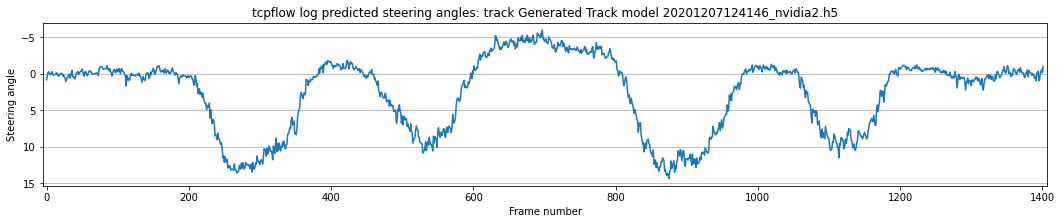

/home/daniel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


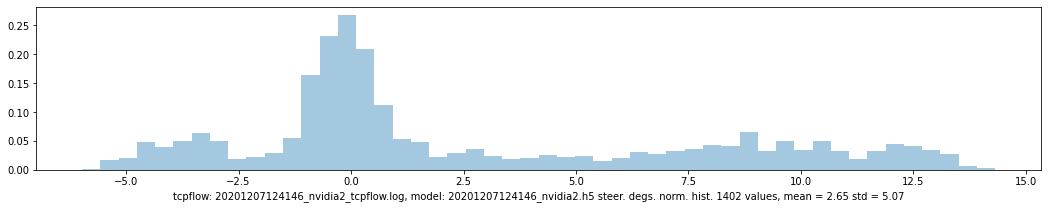

In [2]:
sa = GetSteeringFromtcpflow('../trained_models/nvidia1/tcpflow/20201207091932_nvidia1_no_rain_tcpflow.log')
sarr = np.asarray(sa)
p = sarr[:,0]
g = sarr[:,0]  
plotSteeringAngles(p, g, 25, False, "Generated Track", "20201207124146_nvidia2.h5")
plotBinsFromArray(p, 25, "20201207124146_nvidia2.h5", "20201207124146_nvidia2_tcpflow.log")    

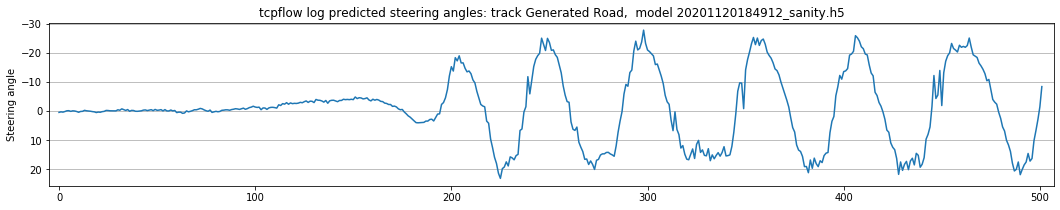

In [2]:
# Steering angle predictions by model 20201107210627_nvidia1.h5
def plotSteeringAngles(p, g, n, save=False, track= "Track Name", mname="model.h5"):
    """
    Plot predicted steering angles
    """
    import matplotlib.pyplot as plt

    plt.rcParams["figure.figsize"] = (18,3)

    plt.plot(p*25)
    # plt.plot(sarr[:,1]*25, label="simulator")

    plt.ylabel('Steering angle')
    plt.ylabel('Frame number')
    # Set a title of the current axes.
    plt.title('tcpflow log predicted steering angles: track ' + track + ' model ' + mname)
    # show a legend on the plot
    #plt.legend()
    # Display a figure.
    # horizontal grid only
    plt.grid(axis='y')
    # set limit
    plt.xlim([-5,len(p)+5])
    plt.gca().invert_yaxis()
    plt.show()

sa = GetSteeringFromtcpflow('../dataset/unity/genRoad/tcpflow/20201120184912_sanity.log')
sarr = np.asarray(sa)
p = sarr[:,0]
g = sarr[:,1]

plotSteeringAngles(p, g, 25, False, "Generated Road, ", "20201120184912_sanity.h5")
#sa = GetSteeringFromtcpflow('../dataset/unity/genRoad/tcpflow/20201120184912_sanity.log')
#plotBinsFromArray(p, 25, "20201120184912_sanity.h5", "tcpflow/20201120184912_sanity.log")        
#type(g)

# TypeError: 'str' object is not callable - cleared by restarting kernel (clearing variables?)

In [3]:
def gos(p, g, n):
    """
    Calculate the goodness-of-steer between a prediction and a ground truth array.
    Inputs
        p: array of floats, steering angle prediction
        g: array of floats, steering angle ground truth.
        n: float, normalization constant
    Output
        gos: float, average of absolute difference between ground truth and prediction arrays
    """
    # todo add type assertion
    assert len(p) == len(g), "Arrays must be of equal length"
    return sum(abs(p - g)) / len(p) * n

#p = sarr[:,0]
#g = sarr[:,1]

#sterr = gos(p,g, 25)

#print("Goodness of steer: {:.2f}".format(sterr))



In [4]:
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
def plotBinsFromArray(svals, nc=25, pname=None, logname = "tcpflow log name"):
    svalscp = [element * nc for element in svals]
    values = len(svalscp)
    mean = ("%.2f" % statistics.mean(svalscp))
    std = ("%.2f" % statistics.stdev(svalscp))
    plt.title=(pname)
    # NB Plotted as normalized histogram
    sns.distplot(svalscp, bins=nc*2, kde=False, norm_hist=True,
    axlabel=  "tcpflow: " + logname + ", model: " + pname + ' steer. degs. norm. hist. ' + str(values) + ' values, mean = ' + mean + ' std = ' + std)
    #if(save):
    #    sns.save("output.png")
    plt.savefig(pname + '.png')

#sa = GetSteeringFromtcpflow('../dataset/unity/genRoad/tcpflow/20201120184912_sanity.log')
#sarr = np.asarray(sa)
#p = sarr[:,0]
#p = sarr[:,0]  
#plotBinsFromArray(p, 25, "20201120184912_sanity.h5", "tcpflow/20201120184912_sanity.log")

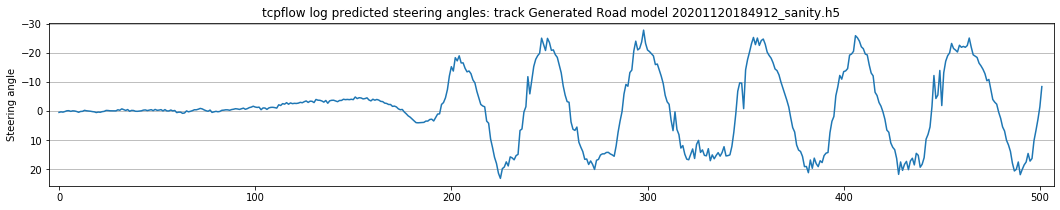

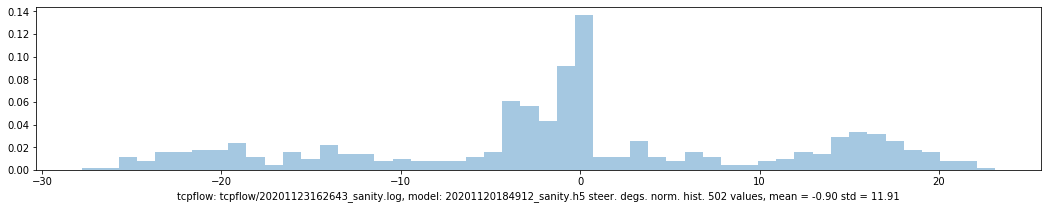

In [5]:
#### ../dataset/unity/genRoad/tcpflow/20201123162643_sanity.log
sa = GetSteeringFromtcpflow('../dataset/unity/genRoad/tcpflow/20201120184912_sanity.log')
sarr = np.asarray(sa)
p = sarr[:,0]
p = sarr[:,0]  
plotSteeringAngles(p, g, 25, False, "Generated Road", "20201120184912_sanity.h5")
plotBinsFromArray(p, 25, "20201120184912_sanity.h5", "tcpflow/20201123162643_sanity.log")

TypeError: 'str' object is not callable

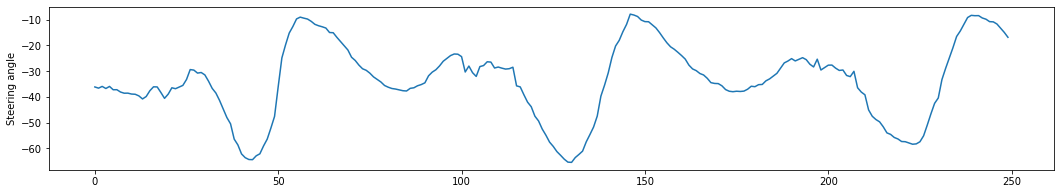

In [6]:
#### ../dataset/unity/genRoad/tcpflow/20201123162643_sanity.log
sa = GetSteeringFromtcpflow('../dataset/unity/genRoad/tcpflow/20201123162643_sanity.log')
sarr = np.asarray(sa)
p = sarr[:,0]
p = sarr[:,0]  
plotSteeringAngles(p, g, 25, False, "Generated Road", "20201123162643_sanity.h5")
plotBinsFromArray(p, 25, "20201123162643_sanity.h5", "tcpflow/20201123162643_sanity.log")



In [ ]:
#### ../dataset/unity/genRoad/tcpflow/20201123162643_sanity_pp.log
sa = GetSteeringFromtcpflow('../dataset/unity/genRoad/tcpflow/20201123162643_sanity_pp.log')
sarr = np.asarray(sa)
p = sarr[:,0]
p = sarr[:,0]  
plotSteeringAngles(p, g, 25, False, "Generated Road", "20201123162643_sanity_pp.h5")
plotBinsFromArray(p, 25, "20201123162643_sanity.h5", "tcpflow/20201123162643_sanity_pp.log")

TypeError: 'str' object is not callable

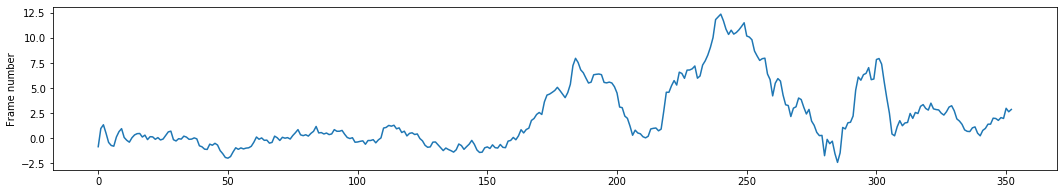

In [7]:
sa = GetSteeringFromtcpflow('../trained_models/nvidia2/tcpflow/20201207111940_nvidia2_tcpflow.log')
sarr = np.asarray(sa)
p = sarr[:,0]
p = sarr[:,0]  
plotSteeringAngles(p, g, 25, False, "Generated Track", "20201207111940_nvidia2.h5")
plotBinsFromArray(p, 25, "20201207111940_nvidia2.h5", "20201207111940_nvidia2_tcpflow.log")